In [59]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')
sample_df = pd.read_csv('./data/sample_submission.csv')

In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
set(train_df.columns) - set(test_df.columns)

{'SalePrice'}

In [147]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath']
len(set(train_df.columns))

290

In [13]:
train_df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

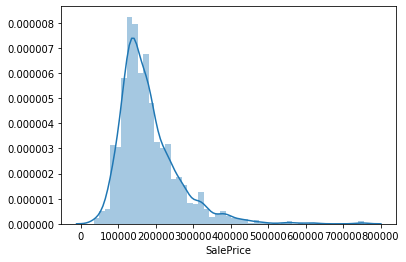

In [15]:
sns.distplot(train_df['SalePrice'])

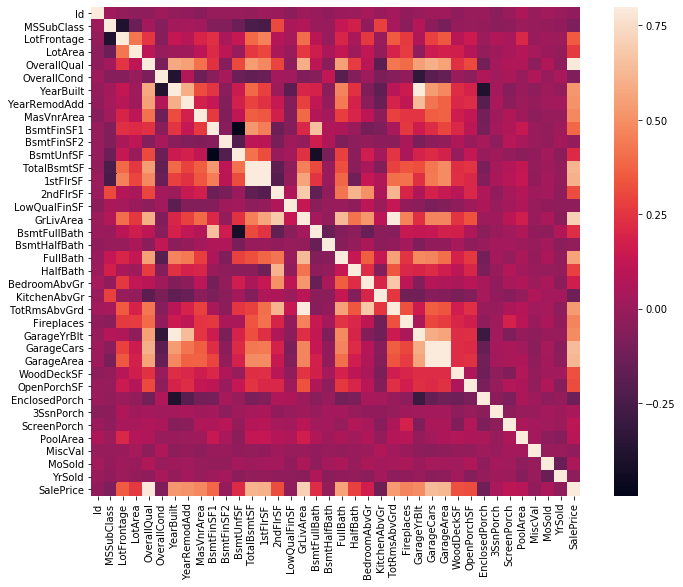

In [22]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

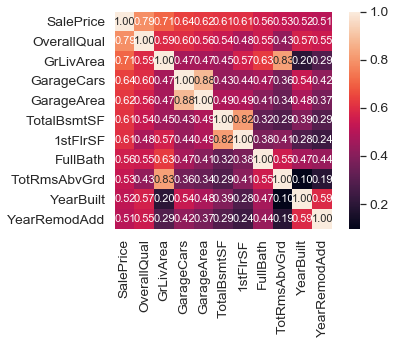

In [28]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


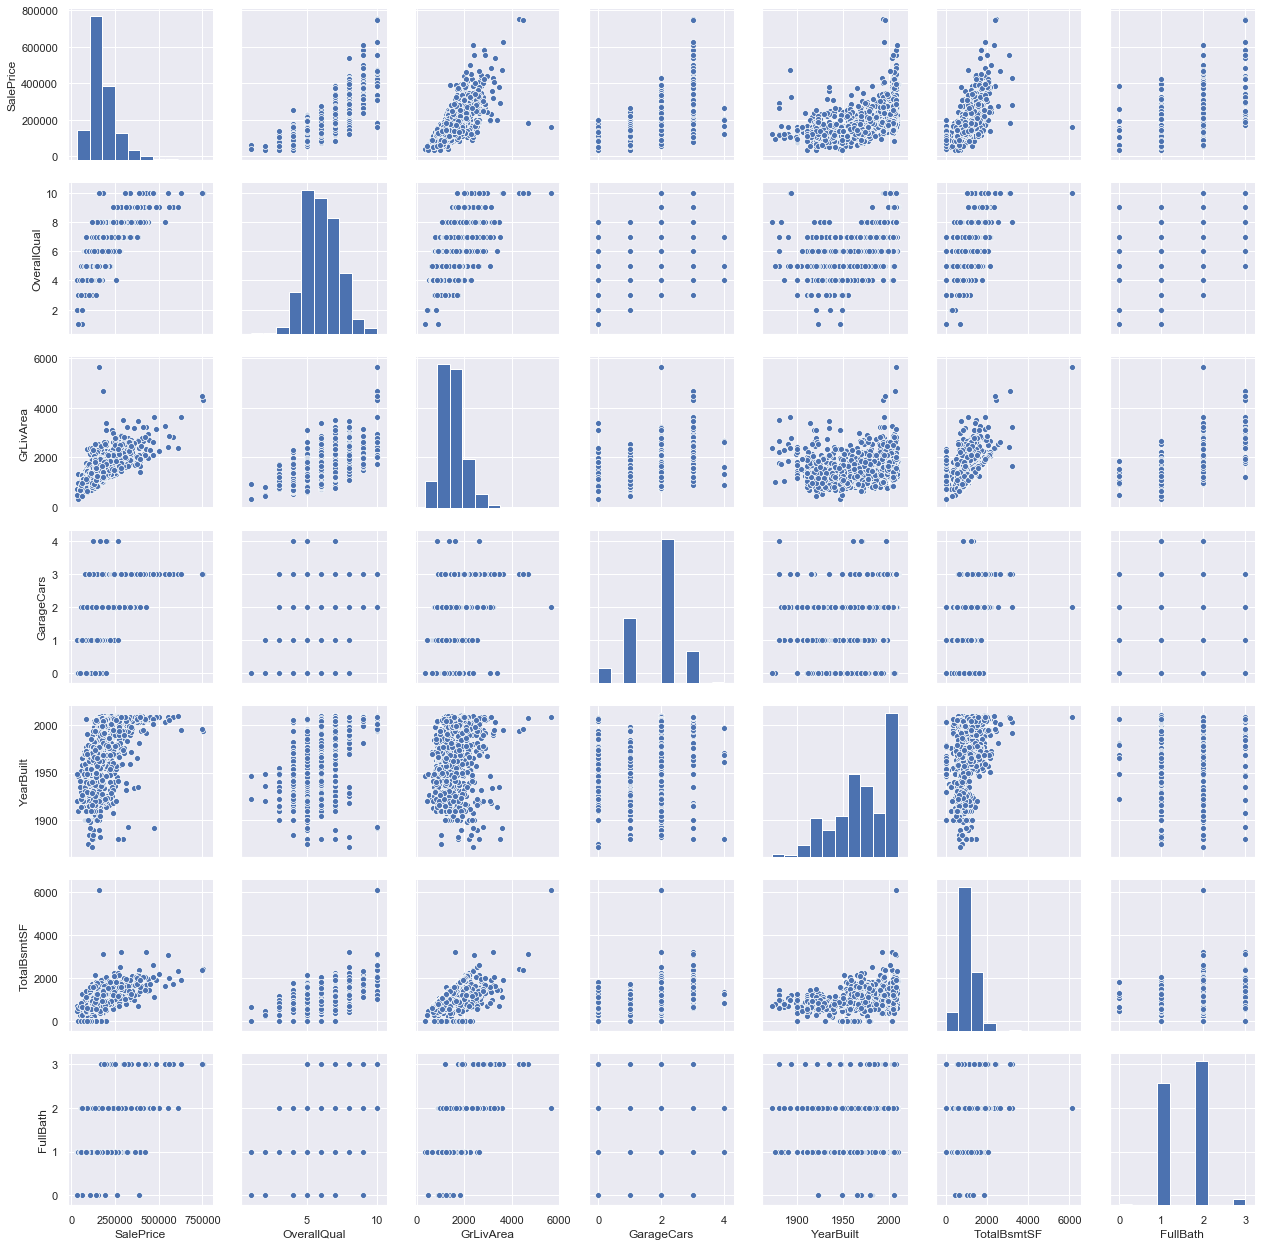

In [31]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();


In [32]:
train_df = train_df.fillna(train_df.mean())

W0928 22:05:40.537275 23460 _axes.py:4263] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


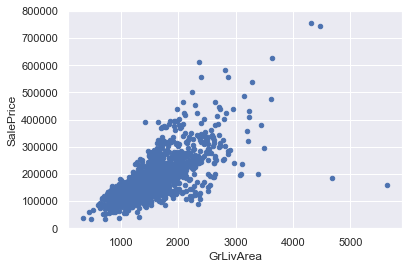

In [35]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [50]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


In [136]:
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
df_train = train_df[cols]
# Create dummy values
df_train = pd.get_dummies(train_df)
#filling NA's with the mean of the column:
train_df = df_train.fillna(train_df.mean())
# Always standard scale the data before using NN
scale = StandardScaler()
X_train = train_df[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']]
X_train = scale.fit_transform(X_train)
# Y is just the 'SalePrice' column
y = df_train['SalePrice'].values
seed = 777
np.random.seed(seed)
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.25, random_state=seed)

In [137]:
def create_model():
    # create model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(53, input_dim=X_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(45, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(15, activation='relu'))
    model.add(keras.layers.Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[keras.metrics.mae])
    return model

In [138]:
model = create_model()
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000028732E30D68>>

In [139]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=255, batch_size=32)

Train on 1095 samples, validate on 365 samples
Epoch 1/255
1095/1095 [==============================] - 1s 1ms/step - loss: 40263482703.7224 - mean_absolute_error: 182923.2538 - val_loss: 35364870609.7096 - val_mean_absolute_error: 174910.2103
Epoch 2/255
1095/1095 [==============================] - 0s 79us/step - loss: 40260307338.6374 - mean_absolute_error: 182914.9965 - val_loss: 35357029014.0931 - val_mean_absolute_error: 174888.9591
Epoch 3/255
1095/1095 [==============================] - 0s 81us/step - loss: 40233168708.9680 - mean_absolute_error: 182847.8634 - val_loss: 35300743992.8110 - val_mean_absolute_error: 174739.3047
Epoch 4/255
1095/1095 [==============================] - 0s 95us/step - loss: 40086153894.9260 - mean_absolute_error: 182492.0562 - val_loss: 35048909321.8192 - val_mean_absolute_error: 174079.0765
Epoch 5/255
1095/1095 [==============================] - 0s 94us/step - loss: 39547007387.4703 - mean_absolute_error: 181202.1671 - val_loss: 34239855422.4219 - v

1095/1095 [==============================] - 0s 128us/step - loss: 1833797882.6228 - mean_absolute_error: 29507.6252 - val_loss: 1181183156.2521 - val_mean_absolute_error: 26124.6678
Epoch 43/255
1095/1095 [==============================] - 0s 103us/step - loss: 1819724060.6977 - mean_absolute_error: 29343.6814 - val_loss: 1158866456.8986 - val_mean_absolute_error: 25808.8497
Epoch 44/255
1095/1095 [==============================] - 0s 81us/step - loss: 1794731423.7370 - mean_absolute_error: 29027.0745 - val_loss: 1139965353.3808 - val_mean_absolute_error: 25624.6849
Epoch 45/255
1095/1095 [==============================] - 0s 97us/step - loss: 1771471029.2457 - mean_absolute_error: 28812.8709 - val_loss: 1129474167.5836 - val_mean_absolute_error: 25541.0690
Epoch 46/255
1095/1095 [==============================] - 0s 132us/step - loss: 1760585427.0539 - mean_absolute_error: 28672.0093 - val_loss: 1114934081.9288 - val_mean_absolute_error: 25407.4844
Epoch 47/255
1095/1095 [===========

1095/1095 [==============================] - 0s 113us/step - loss: 1583567429.0265 - mean_absolute_error: 26334.3545 - val_loss: 908638444.0110 - val_mean_absolute_error: 22651.2747
Epoch 85/255
1095/1095 [==============================] - 0s 119us/step - loss: 1578150345.0447 - mean_absolute_error: 26159.0050 - val_loss: 907384915.6384 - val_mean_absolute_error: 22632.2074
Epoch 86/255
1095/1095 [==============================] - 0s 104us/step - loss: 1574533012.6320 - mean_absolute_error: 26045.3745 - val_loss: 905834990.8164 - val_mean_absolute_error: 22604.4683
Epoch 87/255
1095/1095 [==============================] - 0s 87us/step - loss: 1579722474.0822 - mean_absolute_error: 26187.7764 - val_loss: 900627723.3973 - val_mean_absolute_error: 22482.0127
Epoch 88/255
1095/1095 [==============================] - 0s 87us/step - loss: 1576800409.6000 - mean_absolute_error: 26138.4589 - val_loss: 900211255.0575 - val_mean_absolute_error: 22515.5535
Epoch 89/255
1095/1095 [================

1095/1095 [==============================] - 0s 107us/step - loss: 1519009964.3324 - mean_absolute_error: 25283.5856 - val_loss: 852834660.1205 - val_mean_absolute_error: 21770.1272
Epoch 127/255
1095/1095 [==============================] - 0s 108us/step - loss: 1525590967.6420 - mean_absolute_error: 25330.7860 - val_loss: 851232835.5068 - val_mean_absolute_error: 21691.7893
Epoch 128/255
1095/1095 [==============================] - 0s 93us/step - loss: 1531368831.7662 - mean_absolute_error: 25479.7758 - val_loss: 854058260.8658 - val_mean_absolute_error: 21789.3713
Epoch 129/255
1095/1095 [==============================] - 0s 86us/step - loss: 1530428341.0703 - mean_absolute_error: 25215.6483 - val_loss: 847265266.4986 - val_mean_absolute_error: 21587.3394
Epoch 130/255
1095/1095 [==============================] - 0s 87us/step - loss: 1521479353.3954 - mean_absolute_error: 25081.1170 - val_loss: 858153924.3836 - val_mean_absolute_error: 21857.0184
Epoch 131/255
1095/1095 [============

1095/1095 [==============================] - 0s 93us/step - loss: 1495804126.4511 - mean_absolute_error: 25110.5575 - val_loss: 839956255.9123 - val_mean_absolute_error: 21585.9866
Epoch 169/255
1095/1095 [==============================] - 0s 85us/step - loss: 1494361373.9251 - mean_absolute_error: 24974.8374 - val_loss: 834254567.2767 - val_mean_absolute_error: 21456.7120
Epoch 170/255
1095/1095 [==============================] - 0s 91us/step - loss: 1492670827.8941 - mean_absolute_error: 24844.2509 - val_loss: 827741303.9342 - val_mean_absolute_error: 21280.8643
Epoch 171/255
1095/1095 [==============================] - 0s 90us/step - loss: 1493746461.2237 - mean_absolute_error: 24836.3644 - val_loss: 838067025.1836 - val_mean_absolute_error: 21508.5435
Epoch 172/255
1095/1095 [==============================] - 0s 90us/step - loss: 1495754333.5744 - mean_absolute_error: 25107.0610 - val_loss: 834917638.6630 - val_mean_absolute_error: 21442.5712
Epoch 173/255
1095/1095 [==============

1095/1095 [==============================] - 0s 94us/step - loss: 1478188648.6795 - mean_absolute_error: 24657.3402 - val_loss: 820076970.4329 - val_mean_absolute_error: 21105.5888
Epoch 211/255
1095/1095 [==============================] - 0s 90us/step - loss: 1496163488.6137 - mean_absolute_error: 24906.6371 - val_loss: 820576933.8740 - val_mean_absolute_error: 21160.2441
Epoch 212/255
1095/1095 [==============================] - 0s 89us/step - loss: 1487063633.3589 - mean_absolute_error: 24633.3242 - val_loss: 820462272.0000 - val_mean_absolute_error: 21102.7645
Epoch 213/255
1095/1095 [==============================] - 0s 89us/step - loss: 1476917045.3041 - mean_absolute_error: 24704.6707 - val_loss: 827820114.5863 - val_mean_absolute_error: 21285.1770
Epoch 214/255
1095/1095 [==============================] - 0s 82us/step - loss: 1475976876.7708 - mean_absolute_error: 24762.3577 - val_loss: 823053602.5425 - val_mean_absolute_error: 21184.2800
Epoch 215/255
1095/1095 [==============

1095/1095 [==============================] - 0s 99us/step - loss: 1469206336.0584 - mean_absolute_error: 24493.7573 - val_loss: 822024719.4301 - val_mean_absolute_error: 21164.6948
Epoch 253/255
1095/1095 [==============================] - 0s 88us/step - loss: 1466728717.2091 - mean_absolute_error: 24561.9271 - val_loss: 811917966.2027 - val_mean_absolute_error: 20976.0498
Epoch 254/255
1095/1095 [==============================] - 0s 85us/step - loss: 1468883597.9982 - mean_absolute_error: 24514.3687 - val_loss: 815849384.8548 - val_mean_absolute_error: 21052.9140
Epoch 255/255
1095/1095 [==============================] - 0s 92us/step - loss: 1468707411.4630 - mean_absolute_error: 24480.5992 - val_loss: 816268565.7425 - val_mean_absolute_error: 21046.0508


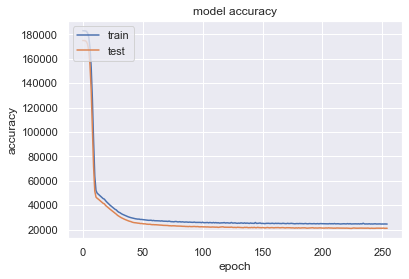

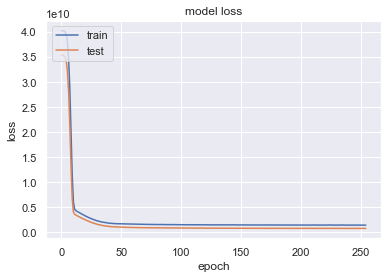

In [140]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
df_test = pd.read_csv('./data/test.csv')
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
id_col = df_test['Id'].values.tolist()
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())
X_test = df_test[cols].values
# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

In [142]:
prediction = model.predict(X_test)

In [143]:
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction

In [144]:
submission.to_csv('./data/answer.csv', index=False)